In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn')
%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data

C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


In [3]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

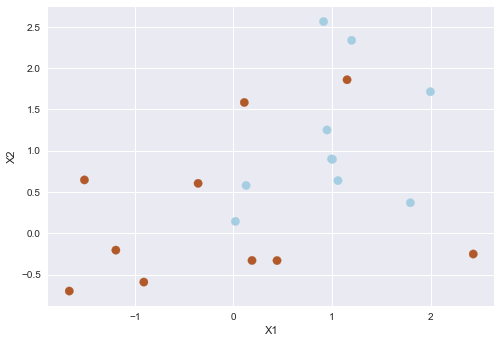

In [17]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

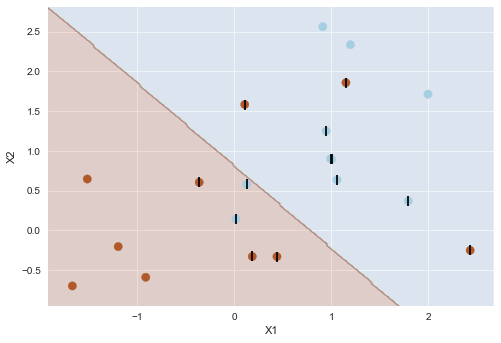

Number of support vectors:  13


In [18]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

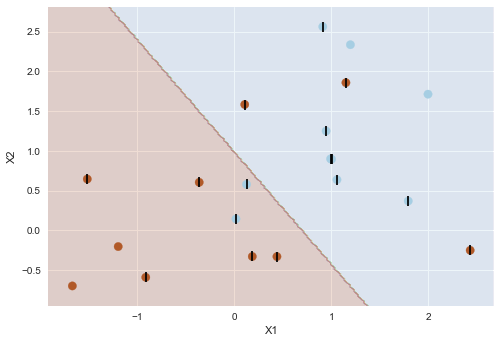

Number of support vectors:  16


In [20]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [65]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([  4.00018692e-04,   4.00018692e-04,   2.99978256e-04,
          2.00009346e-04,   9.99927521e-05,   0.00000000e+00,
          1.55999660e-03]),
 'mean_score_time': array([ 0.00020001,  0.00019999,  0.00020001,  0.00020001,  0.00019999,
         0.        ,  0.        ]),
 'mean_test_score': array([ 0.8 ,  0.8 ,  0.8 ,  0.75,  0.75,  0.75,  0.75]),
 'mean_train_score': array([ 0.79444444,  0.79444444,  0.75      ,  0.77777778,  0.76666667,
         0.76666667,  0.76666667]),
 'param_C': masked_array(data = [0.001 0.01 0.1 1 5 10 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}),
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4]),
 'split0_test_score': array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]),
 'split0_train_score': array([ 0.83333333,  0.83333333,  0.77777778,  0.77777778,  0.77777778,
         0.77777778

In [66]:
# 0.001 is best according to GridSearchCV. 
clf.best_params_

{'C': 0.001}

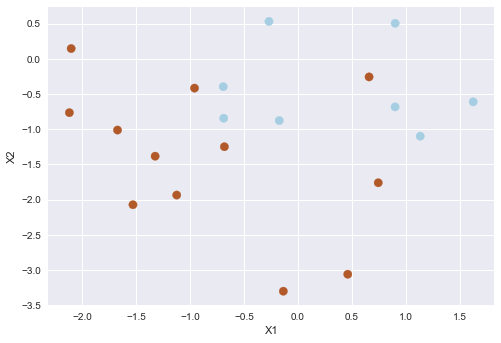

In [67]:
# Generating test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [68]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc2.classes_, columns=svc2.classes_)

    -1   1
-1   2   6
 1   0  12

In [69]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# The misclassification is the same

    -1   1
-1   2   6
 1   0  12

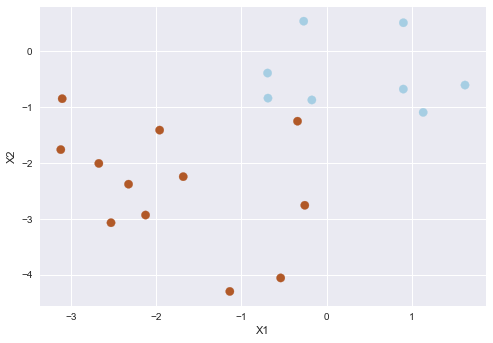

In [70]:
# Changing the test data so that the classes are really seperable with a hyperplane.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

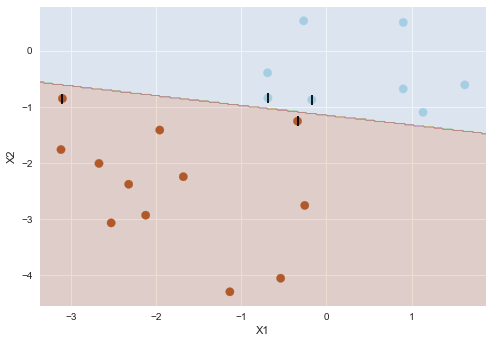

Number of support vectors:  4


In [71]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

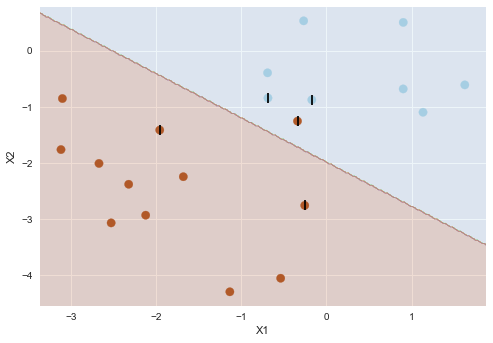

Number of support vectors:  5


In [72]:
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)
plot_svc(svc5, X_test, y_test)

### 9.6.2 Support Vector Machine 

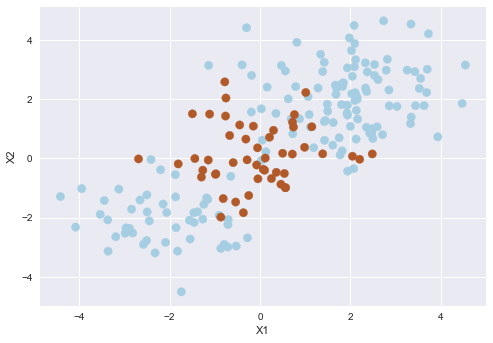

In [73]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

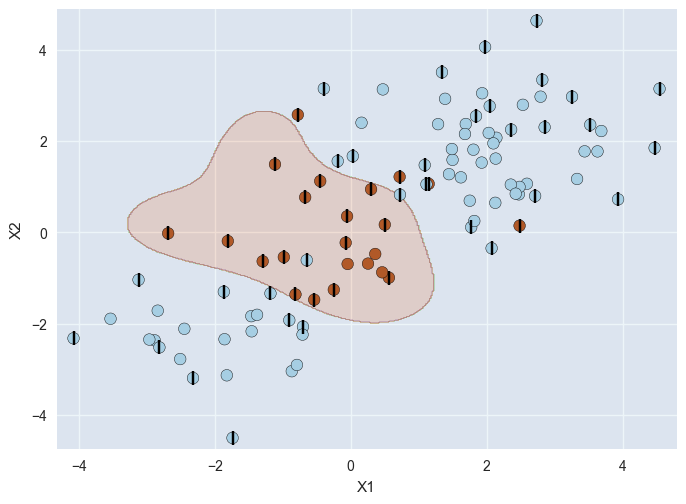

Number of support vectors:  51


In [99]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

plot_svc(svm, X_train, y_train)
plt.style.use('classic')

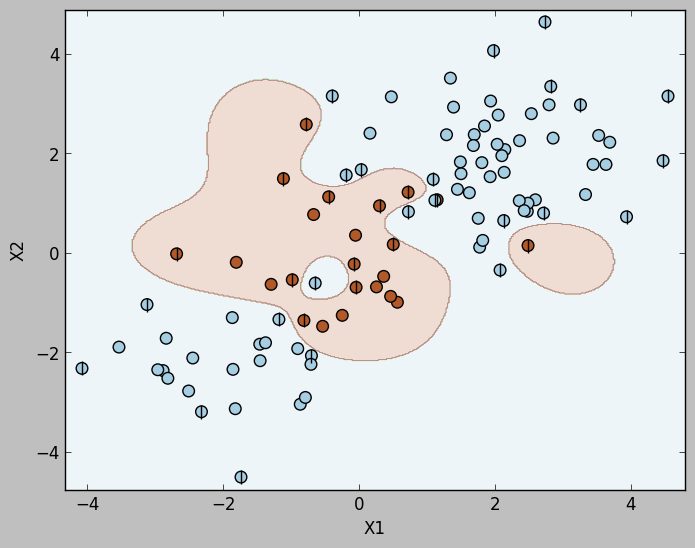

Number of support vectors:  36


In [100]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

plot_svc(svm2, X_train, y_train)

In [101]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.grid_scores_

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 0.5},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 1},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 2},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 3},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 4},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 0.5},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 1},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 2},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 3},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 4},
 mean: 0.92000, std: 0.11024, params: {'C': 1, 'gamma': 0.5},
 mean: 0.92000, std: 0.09015, params: {'C': 1, 'gamma': 1},
 mean: 0.90000, std: 0.09046, params: {'C': 1, 'gamma': 2},
 mean: 0.88000, std: 0.07597, params: {'C': 1, 'gamma': 3},
 mean: 0.85000, std: 0.06424, params: {'C': 1, 'gamma': 4},
 mean: 0.92000, std: 0.07827, params: {'C': 10, 'gamma': 0.5},
 mean:

In [118]:
print(clf.best_params_)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.score(X_test, y_test))
clf.score(X_train, y_train)

{'C': 1, 'gamma': 0.5}
[[67  6]
 [ 9 18]]
0.85


0.93000000000000005

### SVM applied to smarket data

In [120]:
smarket = pd.read_csv('smarket.csv', index_col='Year', usecols=['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'], parse_dates=True)
smarket.Direction = pd.factorize(smarket.Direction)[0]
smarket.drop(['Today'], axis=1, inplace=True)
smarket.head()

             Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Direction
Year                                                            
2001-01-01  0.381 -0.192 -2.624 -1.055  5.010  1.1913          0
2001-01-01  0.959  0.381 -0.192 -2.624 -1.055  1.2965          0
2001-01-01  1.032  0.959  0.381 -0.192 -2.624  1.4112          1
2001-01-01 -0.623  1.032  0.959  0.381 -0.192  1.2760          0
2001-01-01  0.614 -0.623  1.032  0.959  0.381  1.2057          0

In [124]:
# fit SVM to predict Direction from the data. 
collist = [x for x in smarket.columns if x not in ('Direction')]
X = smarket[collist]
y = smarket.Direction

# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
                     'gamma': [0.1, 0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.grid_scores_


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 0.1},
 mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 0.5},
 mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 1},
 mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 2},
 mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 3},
 mean: 0.51840, std: 0.00196, params: {'C': 0.0001, 'gamma': 4},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 0.5},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 1},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 2},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 3},
 mean: 0.51840, std: 0.00196, params: {'C': 0.001, 'gamma': 4},
 mean: 0.51840, std: 0.00196, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.51840, std: 0.00196, params: {'C': 0.01, 'gamma': 0.5},
 mean: 0.51840, std: 0.00196, params: {'C': 0.01, 'gamma': 1},
 mean: 0.51840, std: 0.00

In [127]:
# fit SVM to predict Direction from the data. 
collist = [x for x in smarket.columns if x not in ('Direction')]
X = smarket[collist]
y = smarket.Direction

# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.0001, 0.001, 0.01],
                     'degree': [2,3,4, 5]}]
clf = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.grid_scores_

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.51840, std: 0.00196, params: {'degree': 2, 'C': 0.0001},
 mean: 0.51840, std: 0.00196, params: {'degree': 3, 'C': 0.0001},
 mean: 0.51760, std: 0.00265, params: {'degree': 4, 'C': 0.0001},
 mean: 0.51680, std: 0.00467, params: {'degree': 5, 'C': 0.0001},
 mean: 0.51840, std: 0.00196, params: {'degree': 2, 'C': 0.001},
 mean: 0.51840, std: 0.00196, params: {'degree': 3, 'C': 0.001},
 mean: 0.50720, std: 0.01724, params: {'degree': 4, 'C': 0.001},
 mean: 0.51440, std: 0.02581, params: {'degree': 5, 'C': 0.001},
 mean: 0.51200, std: 0.02146, params: {'degree': 2, 'C': 0.01},
 mean: 0.51440, std: 0.02306, params: {'degree': 3, 'C': 0.01},
 mean: 0.50560, std: 0.03698, params: {'degree': 4, 'C': 0.01},
 mean: 0.51760, std: 0.03675, params: {'degree': 5, 'C': 0.01}]

In [126]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C82D-E47C

 Directory of C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data

20/02/2017  20:25    <DIR>          .
20/02/2017  20:25    <DIR>          ..
24/09/2016  08:37             5,166 Advertising.csv
24/09/2016  08:37            18,079 Auto.csv
24/09/2016  08:37            34,727 Boston.csv
24/09/2016  08:37         1,064,467 Caravan.csv
24/09/2016  08:37            21,339 Carseats.csv
11/02/2017  16:47            75,702 College.csv
24/09/2016  08:37            26,585 Credit.csv
24/09/2016  08:37           462,381 Default.xlsx
24/09/2016  08:37            19,925 Heart.csv
24/09/2016  08:37            27,687 Hitters.csv
24/09/2016  08:37            10,205 Hitters_X_test.csv
24/09/2016  08:37            10,041 Hitters_X_train.csv
24/09/2016  08:37             1,271 Hitters_y_test.csv
24/09/2016  08:37             1,281 Hitters_y_train.csv
24/09/2016  08:37           619,618 Khan_xtest.csv